In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

In [2]:
# importing data set
# sold items data (sid)
sid_data = pd.read_csv('sold items.csv')

In [3]:
sid_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [4]:
# checking numbers of rows and columns
sid_data.shape

(186850, 6)

In [5]:
sid_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
sid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
# data type
type(sid_data)

pandas.core.frame.DataFrame

In [8]:
# making a copy of sid_data 
sid_data_1 = sid_data.copy()

In [9]:
# complete case analysis
sid_data_1.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
# Dropping missing data
# droping order id column
sid_data_1 = sid_data_1[['Product', 'Quantity Ordered', 'Price Each', 'Order Date']]

In [11]:
sid_data_1

,Product,Quantity Ordered,Price Each,Order Date
0,USB-C Charging Cable,2,11.95,04/19/19 08:46
1,NaN,NaN,NaN,NaN
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30
3,Google Phone,1,600,04/12/19 14:38
4,Wired Headphones,1,11.99,04/12/19 14:38
...,...,...,...,...
186845,AAA Batteries (4-pack),3,2.99,09/17/19 20:56
186846,iPhone,1,700,09/01/19 16:00
186847,iPhone,1,700,09/23/19 07:39
186848,34in Ultrawide Monitor,1,379.99,09/19/19 17:30


In [12]:
# Renaming 
sid_data_1.rename(columns={'Product': 'Product', 
                     'Quantity Ordered': 'Quantity', 
                     'Price Each': 'Price', 'Order Date': 'Order Date'}, inplace=True)

In [13]:
sid_data_1.head(10)

,Product,Quantity,Price,Order Date
0,USB-C Charging Cable,2,11.95,04/19/19 08:46
1,NaN,NaN,NaN,NaN
2,Bose SoundSport Headphones,1,99.99,04/07/19 22:30
3,Google Phone,1,600,04/12/19 14:38
4,Wired Headphones,1,11.99,04/12/19 14:38
5,Wired Headphones,1,11.99,04/30/19 09:27
6,USB-C Charging Cable,1,11.95,04/29/19 13:03
7,Bose SoundSport Headphones,1,99.99,04/02/19 07:46
8,USB-C Charging Cable,1,11.95,04/12/19 10:58
9,Macbook Pro Laptop,1,1700,04/24/19 10:38


In [14]:
sid_data_1['Price'].unique()

array(['11.95', nan, '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [15]:
sid_data_1.Price.ffill().head(10)

0    11.95
1    11.95
2    99.99
3      600
4    11.99
5    11.99
6    11.95
7    99.99
8    11.95
9     1700
Name: Price, dtype: object

In [28]:
sid_data_1['Price'].unique()

array(['11.95', nan, '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [30]:
sid_data_1['Price'] = sid_data_1['Price'].str.replace('Price Each','0')

In [31]:
sid_data_1['Price'].unique()

array(['11.95', nan, '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [ ]:
# 

C:\Users\asuberu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


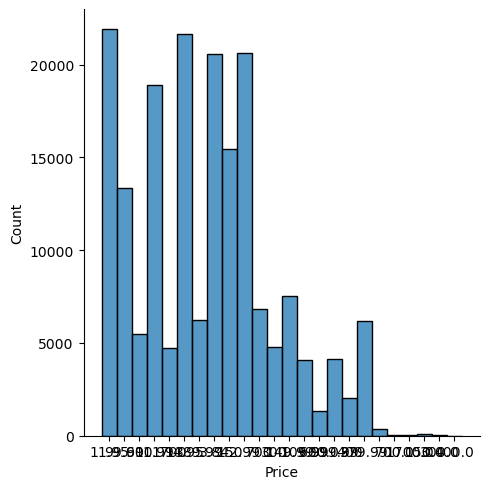

In [32]:
# visualization
sns.displot(data=sid_data_1, x='Price', bins=10, kde=False)

In [35]:
sid_data_1['Price'].plot(kind='bar')

TypeError: no numeric data to plot